In [2]:
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt
import os

## Leemos del directorio data los ficheros
1. vamos a cargar los datos de csv en un formato conveniente, eg. ndarray de numpy o DataFrame de pandas

In [3]:
pages = os.listdir('data/')

vamos a representar los datos gráficamente; qué representaciones nos pueden ayudar?
representar todo en una misma gráfica vs. en gráficas separadas?
cuidado con los ejes autoajustados: para comparar gráficas distintas tienen que compartir escala y límites
## Añadimos todos los histogramas a la vez

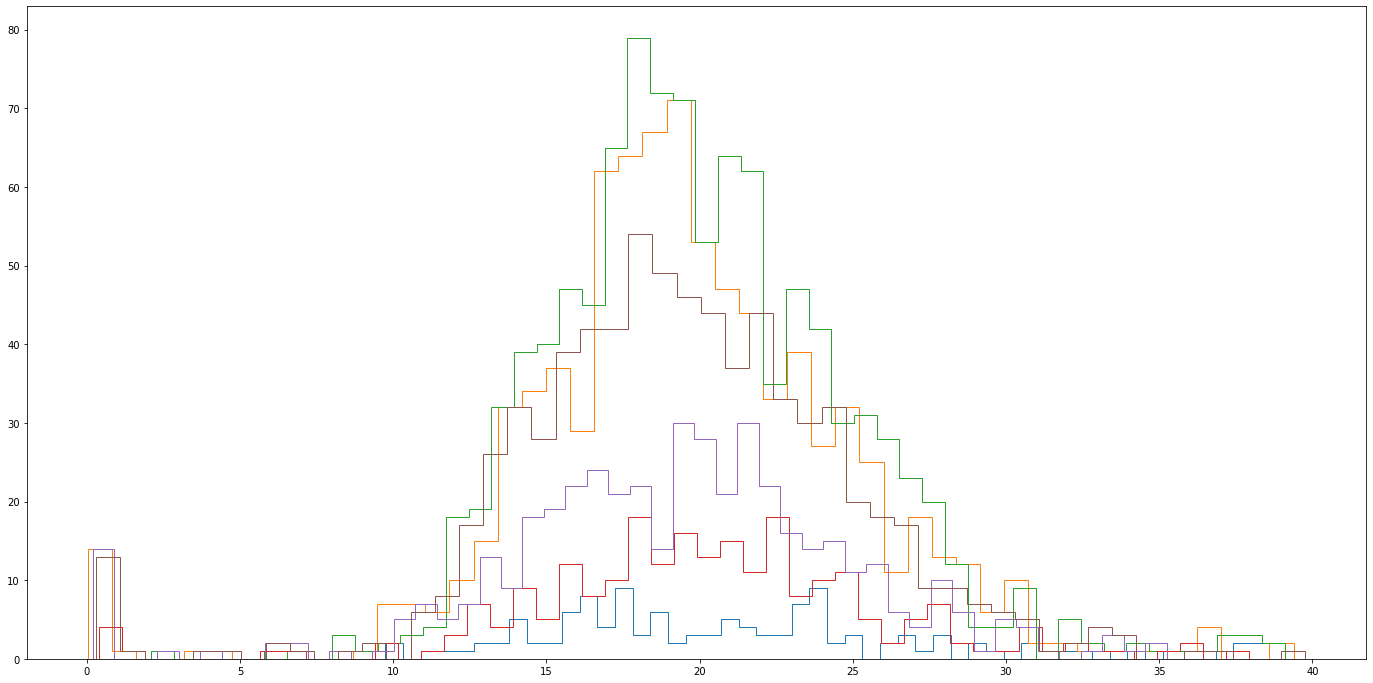

In [4]:
plt.figure(figsize=(24, 12))
for page in pages:
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    plt.hist(df['seconds'], bins = 50, fill=False, histtype='step', label=page)
    
_ = plt.show()

## Vamos a representar las graficas una por una

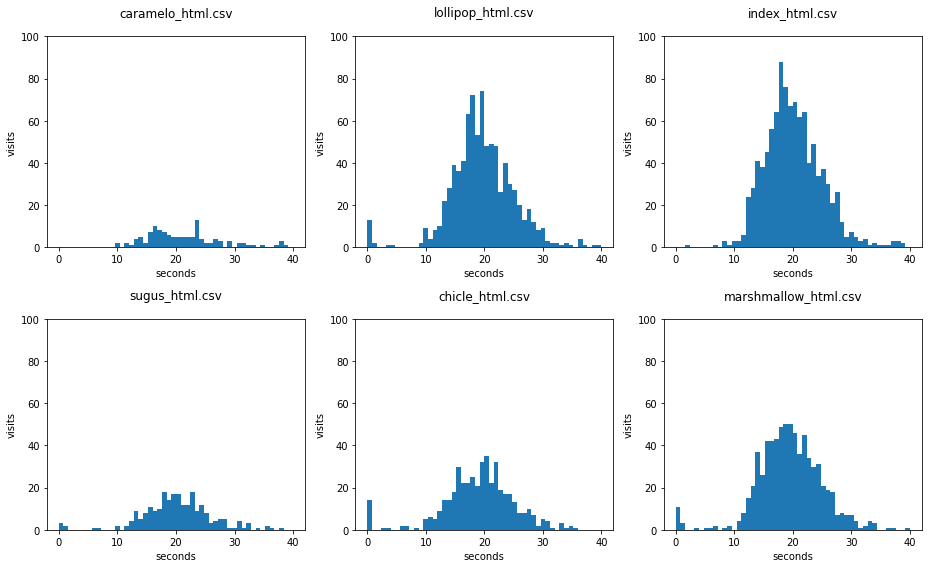

In [5]:
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 8))

for i, axe in enumerate(axes.flatten()):
    page = pages[i]
    
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    
    axe.hist(df['seconds'], bins = 50, range=[0,40])
    
    axe.set_title(label=page, pad=20)
    axe.set_xlabel("seconds")
    axe.set_ylabel("visits")
    axe.set_ylim([0, 100])

figure.tight_layout()

_ = plt.show()

## Activamos la acumulación

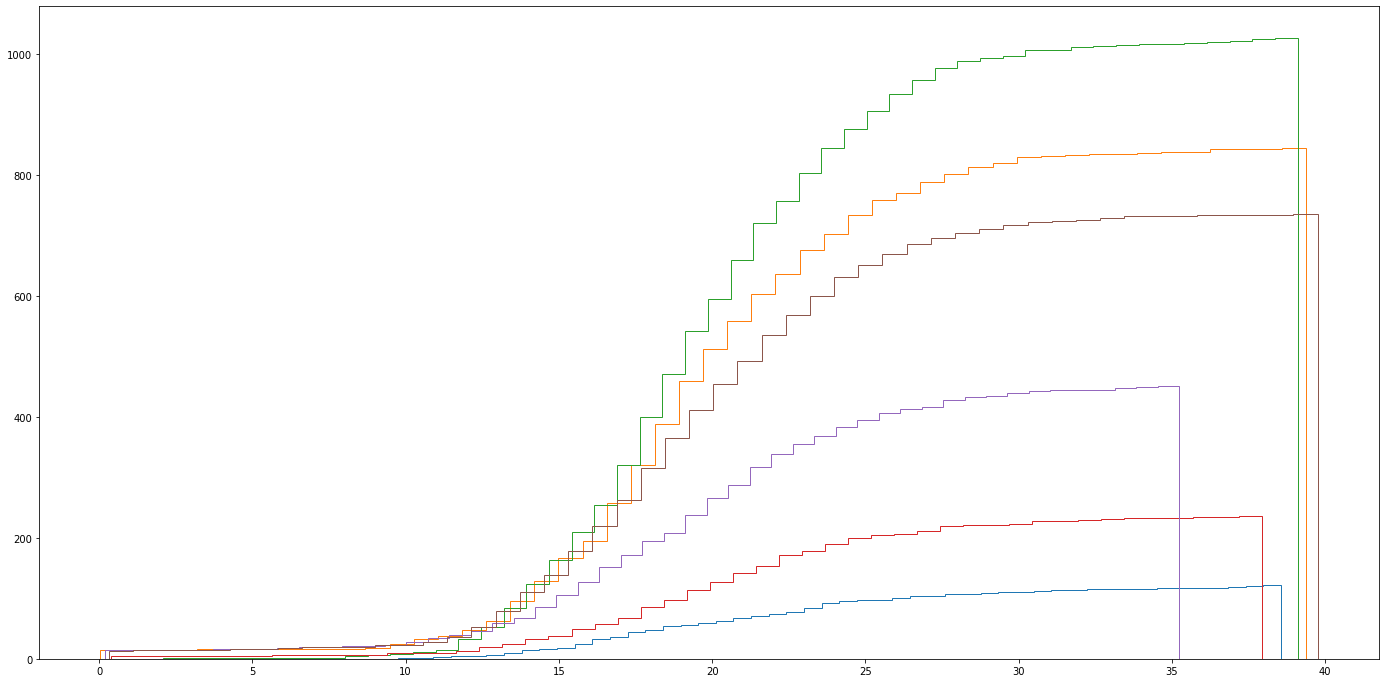

In [6]:
plt.figure(figsize=(24, 12))
for page in pages:
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    plt.hist(df['seconds'], bins = 50, fill=False, histtype='step', label=page, cumulative=True)
    
_ = plt.show()

1. podemos identificar, a ojímetro, qué páginas están siendo scrapeadas y qué páginas no? Qué criterio usamos?

Si, viendo los pequeños picos que aparecen al principio de ciertas paginas en los histogramas.

2. podemos estimar, a mano, qué número aproximado de nuestras visitas diarias se debe a bots y qué número a personas?

Si. si utilizamos una grafica de con el parametro cumulative=True mas o menos podriamos sacar el numero.

3. podemos escribir un programa que, dado un array de tiempos de permanencia, devuelva True si está siendo scrapeada y False en otro caso?


In [7]:
TRESHOLD = 3
def get_number_of_bots_visits(dataframe):
    number_visits = []
    for i in dataframe:
        if i < TRESHOLD:
            number_visits.append(i)
    
    return len(number_visits)


In [8]:
for page in pages:
    csv_path = "data/{0}".format(page)
    df = pandas.read_csv(csv_path)
    print(page)
    print(get_number_of_bots_visits(df['seconds']))

caramelo_html.csv
0
lollipop_html.csv
15
index_html.csv
1
sugus_html.csv
5
chicle_html.csv
15
marshmallow_html.csv
14


In [ ]:
def solution2